# Double Gauss F/5

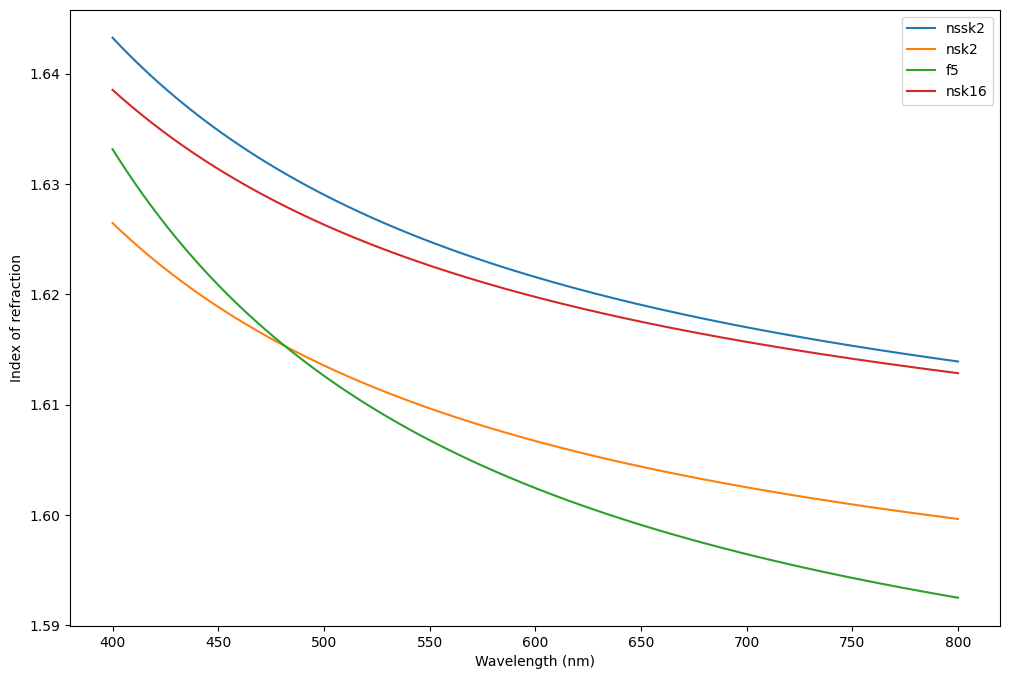

In [1]:
# from https://sterncat.github.io/files/Double_Gauss.html


import torch
import torchlensmaker as tlm

# Materials used in this design are from the Schott catalog
# Define them using Sellmeir models
nssk2 = tlm.SellmeierMaterial(1.4306027, 0.153150554, 1.01390904, 0.00823982975, 0.0333736841, 106.870822)
nsk2 = tlm.SellmeierMaterial(1.28189012, 0.257738258, 0.96818604, 0.0072719164, 0.0242823527, 110.377773)
f5 = tlm.SellmeierMaterial(1.3104463, 0.19603426, 0.96612977, 0.00958633048, 0.0457627627, 115.011883)
nsk16 = tlm.SellmeierMaterial(1.34317774, 0.241144399, 0.994317969, 0.00704687339, 0.0229005, 92.7508526)

tlm.plot_material_models([nssk2, nsk2, f5, nsk16], 400, 800, ["nssk2", "nsk2", "f5", "nsk16"])

In [2]:
diameter = 55

optics = tlm.Sequential(
    tlm.Offset(
        tlm.ObjectAtInfinity(20, angular_size=30),
        y=-10),
    tlm.Multichromatic([400, 500, 600]),
    tlm.Gap(20),
    
    # Lens 1
    tlm.RefractiveSurface(tlm.Sphere(diameter, 56.20238), material=nssk2),
    tlm.Gap(8.75),
    tlm.RefractiveSurface(tlm.Sphere(diameter, 152.28580), material='air'),

    tlm.Gap(0.5),

    # Lens 2
    tlm.RefractiveSurface(tlm.Sphere(0.8*diameter, 37.68262), material=nsk2),
    tlm.Gap(12.5),
    tlm.RefractiveSurface(tlm.CircularPlane(0.9*diameter), material=f5),
    tlm.Gap(3.8),
    tlm.RefractiveSurface(tlm.Sphere(0.8*diameter, 24.23130), material='air'),

    tlm.Gap(16.369445),
    
    # Aperture
    tlm.Aperture(0.5*diameter),
    
    tlm.Gap(13.747957),

    # Lens 3
    tlm.RefractiveSurface(tlm.Sphere(0.8*diameter, -28.37731), material=f5),
    tlm.Gap(3.8),
    tlm.RefractiveSurface(tlm.CircularPlane(0.8*diameter), material=nsk16),
    tlm.Gap(11),
    tlm.RefractiveSurface(tlm.Sphere(0.7*diameter, -37.92546), material='air'),

    tlm.Gap(0.5),

    # Lens 4
    tlm.RefractiveSurface(tlm.Sphere(0.8*diameter, 177.41176), material=nsk16),
    tlm.Gap(7),
    tlm.RefractiveSurface(tlm.Sphere(0.8*diameter, -79.41143), material='air'),

    tlm.Gap(61.487536),

    tlm.ImagePlane(80),
)

tlm.show(optics, dim=2, end=10, color_dim="object", sampling={"base": 5, "object": 3, "wavelength": 1})

ray variables RayVariables(variables={'base', 'object', 'wavelength'}, mins={'base': tensor(-10., dtype=torch.float64), 'object': tensor(-0.2618, dtype=torch.float64), 'wavelength': tensor(400., dtype=torch.float64)}, maxs={'base': tensor(10., dtype=torch.float64), 'object': tensor(0.2618, dtype=torch.float64), 'wavelength': tensor(600., dtype=torch.float64)})
